144


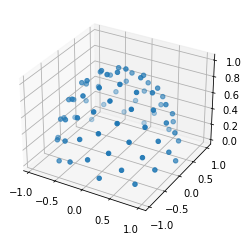

In [6]:
from numpy import pi, cos, sin, arccos, arange
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
from tifffile import imsave
import math

def Fibonacci(N):
    F0 = 1
    F = 1
    sum = 0
    for i in range(N - 2):
        sum = F0 + F
        F0 = F
        F = sum
    return F
Fibo_n = 12
num_pts = Fibonacci(Fibo_n)
indices = arange(0, num_pts, dtype=float)
print(len(indices))
phi = arccos(1 - 2 * indices/num_pts)
theta = pi * indices * 2 * num_pts/Fibonacci(Fibo_n - 1)
lx, ly, lz = cos(theta) * sin(phi), sin(theta) * sin(phi), cos(phi)

pp.figure().add_subplot(111, projection='3d').scatter(lx[0:72], ly[0:72], lz[0:72])
pp.show()

In [5]:
FRAME_SIZE = 50
HALF_SIZE = int(FRAME_SIZE/2)
WIDTH = 5
def Generate3DLinePattern(lx,ly,lz):
    weight = np.zeros([FRAME_SIZE,FRAME_SIZE,FRAME_SIZE])
    for i in range(FRAME_SIZE):
        for j in range(FRAME_SIZE):
            for k in range(FRAME_SIZE):
                x = i-HALF_SIZE
                y = j-HALF_SIZE
                z = k-HALF_SIZE
                dist_square = x**2 + y**2 + z**2 - (x*lx + y*ly + z*lz)**2
                if dist_square < WIDTH**2:
                    weight[i,j,k] = 1
                else:
                    weight[i,j,k] = 0 
    return weight - np.mean(weight)
image = np.zeros([FRAME_SIZE,FRAME_SIZE,FRAME_SIZE])
for n in range(len(indices)):
    image = image + Generate3DLinePattern(lx[n], ly[n], lz[n])
    imsave('Line_Pattern.tif',image>0)
